In [1]:
import torch
import torchvision.transforms as transforms

from PIL import Image

from dataset import MPII
from encoder import AutoEncoder

img = MPII()[5]
encoder = AutoEncoder()
encoder.load_state_dict(torch.load("checkpoint/checkpoint_2021_10_08_03:20:11/checkpoint_2021_10_08_03:20:11.pth")['model_state_dict'])
encoder.eval()

raw_encoder = AutoEncoder()
raw_encoder.eval()

Successfully load 24984 images!


AutoEncoder(
  (encoder): Encoder(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (res1): ResBlock(
      (conv1): Conv3x3(
        (conv1): Conv2d(64, 8, kernel_size=(1, 1), stride=(1, 1))
        (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(8, 256, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU()
      )
      (conv2): Conv3x3(
        (conv1): Conv2d(256, 8, kernel_size=(1, 1), stride=(1, 1))
        (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(8, 256, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU()
      )
      (relu): ReLU()
      (channel_scaler): Conv3x3(
        (conv1): Conv2d(64, 8, kernel_size=(1, 1), stride=(1, 1))
        (conv2): Conv2d(8, 8, kernel_size=(3, 3), stri

In [2]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

to_PIL = transforms.ToPILImage()


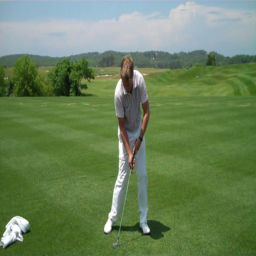

In [3]:
img_ori = invTrans(img).squeeze()
img_ori_PIL = to_PIL(img_ori)
img_ori_PIL

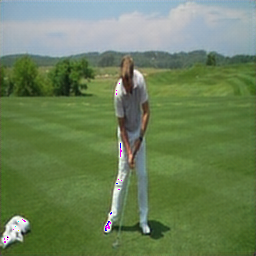

In [4]:
img_recon = encoder(img.unsqueeze(0))
img_recon = invTrans(img_recon).squeeze()
img_recon = to_PIL(img_recon)
img_recon

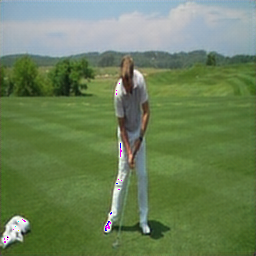

In [5]:
f2, f4 = encoder.encoder(img.unsqueeze(0))
img_recon = encoder.decoder(f2, f4)
img_recon = invTrans(img_recon).squeeze()
img_recon = to_PIL(img_recon)
img_recon